## Assignment 2: Market Segmentation, Conjoint Analysis, and a Dashboard

In [3]:
%cd /Users/shimonyagrawal/Desktop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/shimonyagrawal/Desktop


## Part 1: Segmentation

In [4]:
golf = pd.read_csv('golf.csv')

FileNotFoundError: [Errno 2] File golf.csv does not exist: 'golf.csv'

In [1]:
golf.top(10)

NameError: name 'golf' is not defined

#### A. Drop the courseID variable.
#### a. Why will courseID not be relevant in a clustering model?

In [4]:
golf = golf.drop('courseID', 1)
golf

,elevation,square_feet,est_playing_time,land_obstacles,water_obstacles,tunnel_shots,est_construction_cost,est_maintenance_cost,average_hole_length,average_hole_width
0,11.64,21037.18,43.35,10.0,3.0,3.0,103082.72,7261.22,18.99,3.90
1,6.58,23646.44,42.30,10.0,4.0,3.0,91637.93,6553.91,21.35,2.49
2,11.08,20012.28,41.43,9.0,3.0,3.0,107049.47,5847.06,19.09,2.63
3,9.91,20761.90,46.04,10.0,4.0,3.0,101799.55,8876.01,19.36,3.51
4,11.99,19818.75,44.82,7.0,6.0,4.0,94731.84,8445.70,16.81,2.67
...,...,...,...,...,...,...,...,...,...,...
245,10.45,23963.73,51.46,8.0,4.0,3.0,99027.52,9333.81,20.39,2.63
246,13.77,23337.77,51.39,9.0,3.0,4.0,61096.93,7864.50,17.06,2.93
247,7.01,23951.83,41.96,7.0,3.0,2.0,106438.63,2745.81,18.13,2.53
248,8.70,23850.69,45.10,6.0,3.0,3.0,98163.76,7955.81,20.32,3.79


The course ID is not relevant in clustering just number indicating unique identifier. This variable will not yeild any results in the analysis since it's just a number depicting each response by golf course vendors. Here, it does not have any significant value required for analysis. 

#### B. Call the describe() function on your dataset.
#### a. How does this function help you to gain an overall sense of the columns and values in this (or any other) dataset? Why is this valuable for any analyst who will use a dataset to build a model?

In [5]:
golf.describe()

,elevation,square_feet,est_playing_time,land_obstacles,water_obstacles,tunnel_shots,est_construction_cost,est_maintenance_cost,average_hole_length,average_hole_width
count,250.00000,250.000000,250.000000,250.000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,10.90348,22052.677600,44.916120,7.840,3.968000,2.944000,94956.160200,7779.288160,19.757280,2.964680
std,2.52390,2708.177478,5.001146,1.544,0.775488,0.598579,11656.524492,1990.536582,1.750693,0.459777
min,2.92000,14357.480000,31.630000,3.000,2.000000,2.000000,61096.930000,2682.460000,14.690000,1.640000
25%,9.45250,20162.532500,41.430000,7.000,3.000000,3.000000,86997.525000,6527.242500,18.560000,2.632500
50%,11.08500,22030.715000,44.780000,8.000,4.000000,3.000000,94727.880000,7760.000000,19.780000,2.990000
75%,12.70500,23974.867500,48.157500,9.000,4.000000,3.000000,102375.640000,8935.887500,20.925000,3.300000
max,17.77000,29712.520000,58.020000,14.000,6.000000,4.000000,126247.720000,12589.800000,25.490000,4.210000


The describe function gives the descriptive statistics of the variables which summarises the distribution of the variables in the datastet. Summary statistics give a quantitative analysis of the data which can be useful in simplifying large amount of data. Using the summary statistics, the analyst can identify outliers as well as where the data is skewed. 

#### C. Data scaling.
#### a. Do your variables need to be standardized? Why or why not?

The variables need to standardized since they are measured on different scales. For instance, square_feet is measured in feet but the est_playing_time is measured in minutes. Likewise, est_construction_cost is measured in dollars. All variables are hence, measured in different scales. Using the standardisation, they can be compared easily. 

#### b. If your data requires standardization, use Python to convert your values into z-scores, and store the normalized data in a new dataframe. If not, proceed to step C.

In [43]:
from sklearn.preprocessing import StandardScaler 

data_scaling = StandardScaler()
data_scaling.fit(golf)

golf_normalize = data_scaling.transform(golf)
golf_normalize = pd.DataFrame(data = golf_normalize, index = golf.index , columns = golf.columns)
print(golf_normalize.describe().round(2))

       elevation  square_feet  est_playing_time  land_obstacles  \
count     250.00       250.00            250.00          250.00   
mean       -0.00        -0.00              0.00            0.00   
std         1.00         1.00              1.00            1.00   
min        -3.17        -2.85             -2.66           -3.14   
25%        -0.58        -0.70             -0.70           -0.55   
50%         0.07        -0.01             -0.03            0.10   
75%         0.72         0.71              0.65            0.75   
max         2.73         2.83              2.63            4.00   

       water_obstacles  tunnel_shots  est_construction_cost  \
count           250.00        250.00                 250.00   
mean              0.00          0.00                   0.00   
std               1.00          1.00                   1.00   
min              -2.54         -1.58                  -2.91   
25%              -1.25          0.09                  -0.68   
50%               

#### D. Elbow chart.
#### a. Build an elbow chart to help give you a sense of how you might build your model.

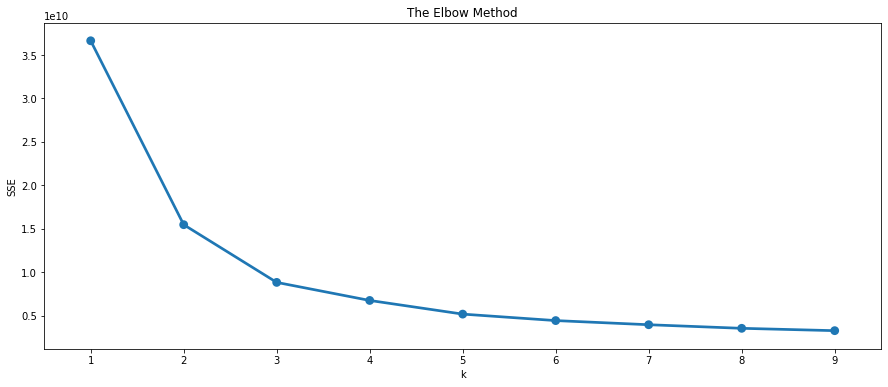

In [44]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=654)
    kmeans.fit(golf)
    sse[k] = kmeans.inertia_
    
    
plt.figure(figsize=(15,6))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

#### E. How many clusters will you use for your k-means model? 

Based on the elbow method, my optimal clusters are found to be 3 clusters. I will be dividing my clusters based on the square feet, estimated construction cost and estimated maintenance cost. 

#### F. Build a k-means model with your desired number of clusters.

In [25]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 3, random_state = 500)
kmeans_model.fit(golf_normalize)
cluster_labels = kmeans_model.labels_

In [53]:
golf_cluster = golf.assign(Cluster = cluster_labels)
grouped = golf_cluster.groupby(['Cluster'])

grouped.agg({ 
'square_feet': 'mean',
'est_construction_cost' : 'mean',
'est_maintenance_cost' : 'mean'}).round(2)

,square_feet,est_construction_cost,est_maintenance_cost
Cluster,,,
0,24754.41,84712.52,7551.36
1,19985.26,105199.56,7382.96
2,22149.62,92833.78,8187.60


In [48]:
golf_cluster.head()

,elevation,square_feet,est_playing_time,land_obstacles,water_obstacles,tunnel_shots,est_construction_cost,est_maintenance_cost,average_hole_length,average_hole_width,Cluster
0,11.64,21037.18,43.35,10.0,3.0,3.0,103082.72,7261.22,18.99,3.90,1
1,6.58,23646.44,42.30,10.0,4.0,3.0,91637.93,6553.91,21.35,2.49,2
2,11.08,20012.28,41.43,9.0,3.0,3.0,107049.47,5847.06,19.09,2.63,1
3,9.91,20761.90,46.04,10.0,4.0,3.0,101799.55,8876.01,19.36,3.51,1
4,11.99,19818.75,44.82,7.0,6.0,4.0,94731.84,8445.70,16.81,2.67,1


#### G. Generate and show summary statistics about each of your clusters.

In [49]:
golf_cluster = golf.assign(Cluster = cluster_labels)
grouped = golf_cluster.groupby(['Cluster'])

grouped.agg({ 
'square_feet': 'mean',
'est_construction_cost' : 'mean',
'est_maintenance_cost' : 'mean'}).round(2)

,square_feet,est_construction_cost,est_maintenance_cost
Cluster,,,
0,24754.41,84712.52,7551.36
1,19985.26,105199.56,7382.96
2,22149.62,92833.78,8187.60


#### H. Build any three simple visualizations to help management better understand your clusters (a simple visualization could be a histogram, a barplot, a scatterplot, etc.) You may wish to facet your visualizations by cluster.

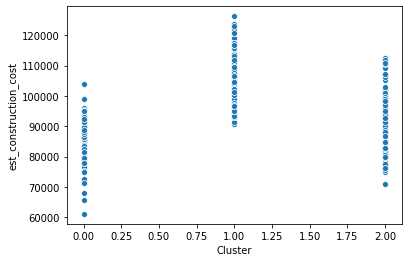

In [55]:
sns.scatterplot(data = golf_cluster, x = 'Cluster' , y = 'est_construction_cost')

The scatterplot depicts each cluster in terms of their construction costs. As seen, cluster 0 falls in lower construction costs, cluster 1 in higher costs and cluster 2 in the middle cost range. The management can use this information to identify the vendors based on their cost. 

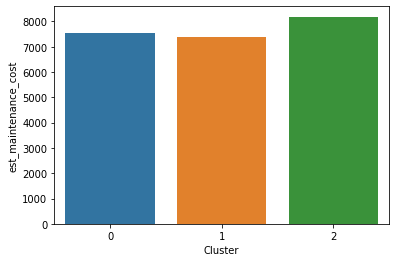

In [58]:
sns.barplot(data = golf_cluster, x = 'Cluster', y = 'est_maintenance_cost', ci = None)

The bar plot depicts each cluster in terms of their maintenance costs. As seen, cluster 0 and 1 fall in lower maintenance costs where cluster 2 has higher costs. Interestingly, the cluster 2 has medium price range in terms of construction cost but a higher maintenance cost. This can be due to their focus on providing great after-service. 

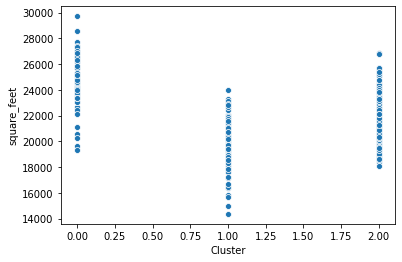

In [60]:
sns.scatterplot(data = golf_cluster, x = 'Cluster' , y = 'square_feet')

The scatterplot depicts each cluster in terms of their square feet. As seen, cluster 0 falls in higher square feet, 
cluster 1 fall in lower square feet where cluster 2 has a medium range. Interestingly, this scatterplot yields similar results as the maintenance cost scatter plot showing a better relation between the two variables. 

#### I. Give a descriptive label to each one of your clusters, along with a sentence or two of explanation for the label that you chose. For each cluster, also include a sentence or two with your thoughts about why this cluster’s courses might be good (or bad) for Lobster Land.

Low Construction Cost <- Cluster 0 has an average square feet of 24,000 along with construction cost of $85,000 and maintenance cost of $7,500. Lobster Land Management can use this cluster to identify golf course vendors that have low construction costs.

Low Square Feet <- Cluster 1 has lower average square feet of 19,000 with high construction cost of $105,199 and lower maintenance cost of $7,300. This cluster can help the management different it's vendors have the highest construction costs but low square feet. This cluster will help them identify vendors they 'don't need' since these vendors have higher costs with respect to square feet. It won't be beneficial for them to chose this cluster due to high costs. 

Higher Maintenance Cost <- Cluster 2 has average square feet of 22,000 with construction cost of $92,000 and highest maintenance cost of $8,187. This cluster seems an ideal condition with the construction costs and maintenance costs match correctly with the square feet. 

## Part 2: Conjoint Analysis

#### A. Read the dataset hotel_options.csv into your local environment in Jupyter Notebook.

In [34]:
hotel = pd.read_csv('hotel_options.csv')

In [6]:
hotel.head()

,bundle,breakfast,flex_in_out,pool_type,tennis_court,jacuzzi,WiFi,rating
0,1,NONE,Yes,Indoor Pool,No,Yes,No WiFi,2.45
1,2,NONE,Yes,Indoor Pool,No,Yes,Regular Speed WiFi,2.40
2,3,NONE,Yes,Indoor Pool,No,Yes,SuperSpeed WiFi,2.41
3,4,NONE,Yes,Indoor Pool,No,No,No WiFi,2.49
4,5,NONE,Yes,Indoor Pool,No,No,Regular Speed WiFi,2.58


#### B. Based on the descriptions shown above, which of your variables are numeric, and which are categorical?

The variables breakfast, flex_in_out, pool_type, tennis_court, jacuzzi and WiFi are categorical variables and bundle and rating are numerical variables. 

#### C. Use the pandas get_dummies() function in order to prepare these variables for use in a linear model. Inside this function, include this argument: drop_first = True. Doing this will save us from the multicollinearity problem that would make our model unreliable.

In [15]:
hotel_dummies = pd.get_dummies(hotel, drop_first = True, columns = ['breakfast', 'flex_in_out', 'pool_type', 'tennis_court', 'jacuzzi', 'WiFi'])
hotel_dummies

,bundle,rating,breakfast_LIGHT,breakfast_NONE,flex_in_out_Yes,pool_type_Indoor and Outdoor Pools,pool_type_Outdoor Pool,tennis_court_Yes,jacuzzi_Yes,WiFi_Regular Speed WiFi,WiFi_SuperSpeed WiFi
0,1,2.45,0,1,1,0,0,0,1,0,0
1,2,2.40,0,1,1,0,0,0,1,1,0
2,3,2.41,0,1,1,0,0,0,1,0,1
3,4,2.49,0,1,1,0,0,0,0,0,0
4,5,2.58,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
211,212,2.50,0,0,0,1,0,1,1,1,0
212,213,2.95,0,0,0,1,0,1,1,0,1
213,214,2.40,0,0,0,1,0,1,0,0,0
214,215,2.48,0,0,0,1,0,1,0,1,0


#### D. Build a linear model with your data, using the outcome variable rating, and with all of your other variables (other than bundle number) as inputs.

In [17]:
hotel_dummies.columns

Index(['bundle', 'rating', 'breakfast_LIGHT ', 'breakfast_NONE',
       'flex_in_out_Yes', 'pool_type_Indoor and Outdoor Pools',
       'pool_type_Outdoor Pool', 'tennis_court_Yes', 'jacuzzi_Yes',
       'WiFi_Regular Speed WiFi', 'WiFi_SuperSpeed WiFi'],
      dtype='object')

In [19]:
x = hotel_dummies[['breakfast_LIGHT ', 'breakfast_NONE',
       'flex_in_out_Yes', 'pool_type_Indoor and Outdoor Pools',
       'pool_type_Outdoor Pool', 'tennis_court_Yes', 'jacuzzi_Yes',
       'WiFi_Regular Speed WiFi', 'WiFi_SuperSpeed WiFi']]
y = hotel_dummies['rating']

In [24]:
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics

lr_model = lr()
lr_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 #### E. Display the coefficient values of your model inputs.

In [27]:
coef_hotel = pd.DataFrame(lr_model.coef_ , x.columns, columns = ['Coefficient'])
coef_hotel

,Coefficient
breakfast_LIGHT,-0.152500
breakfast_NONE,-0.676667
flex_in_out_Yes,-0.291759
pool_type_Indoor and Outdoor Pools,-0.100972
pool_type_Outdoor Pool,1.968056
tennis_court_Yes,-0.256759
jacuzzi_Yes,0.318426
WiFi_Regular Speed WiFi,0.494167
WiFi_SuperSpeed WiFi,0.697500


#### F. Write a paragraph for Lobster Land management about what your model is showing you. It would be good here to include some detail about which features seemed to be most popular, or least popular, among respondents.

Based on the model, it can be seen that most respondents prefer having a lighter breakfast rather than a full buffet.  It can also be inferred that most respondents prefer outdoor pools, jacuzzi and a super speed WiFi. When given the option, users prefer Super Speed WiFi along with a Tennise Court, Jacuzzi and an Outdoor Pool. The Lobster Land management should focus on providing these features to its users. 

Interestingly, it can be seen that people are willing to pay an extra fee for these features indicating that if the management decides on improving them, people will be willing to pay. All these features are an extra cost but still the most popular. 